In [1]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'
from scipy.optimize import fsolve
import pandas as pd

In [23]:
M_des = 2.4
theta_min = 0.373
num_lines = 4
GAMMA = 1.4

implements $\mu = \sin^{-1} \frac{1}{M}$ to find the mach angle

In [24]:
def mach_angle(M):
    return np.degrees(np.arcsin(1/M))

implements $\nu = \sqrt{\frac{\gamma + 1}{\gamma - 1}} \tan^{-1} \sqrt{\frac{\gamma -1}{\gamma + 1}(M^2 - 1)} - \tan ^{-1} \sqrt{M^2 - 1}$ to find the prandtl-meyer function

In [25]:
def PM(M, gamma = GAMMA):
    first = np.sqrt((gamma + 1)/(gamma - 1))
    second = np.degrees(np.arctan(np.sqrt((gamma - 1)/(gamma + 1) * (M**2 - 1))))
    third = np.degrees(np.arctan(np.sqrt(M**2 - 1)))
    return first*second - third

In [26]:
PM(3, 1.4)

49.75734674434608

uses ```scipy.optimize.fsolve``` to find the mach number from prandtl-meyer function

In [27]:
def M_from_nu(nu, gamma = GAMMA):
    def temp(M, nu, gamma = GAMMA):
        return PM(M, gamma) - nu
    
    return fsolve(temp, 1.5, args=(nu, gamma))[0]

testing for $M=2$ and $\gamma = 1.4$

In [28]:
M_from_nu(26, gamma = 1.4)

1.9862499490360108

init the dataframe to store everything, makes it easy to store data and display what its storing

In [29]:
row = {'name': '', 'R+': 0.0, 'R-': 0.0, 'theta': 0.0, 'nu': 0.0, 'M': 0.0, 'mu': 0.0, 'theta + mu': 0.0, 'theta - mu': 0.0, 'x': 0.0, 'y': 0.0}
temp = []


alphabet = [*'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ±!@£$%^&*()_+{}:"|<>?,./;\[]-=§~`¡€#¢∞¶•ªº≠“‘…æ«≤≥Ω≈çµøπœ']
print(f"maximum number of characteristics: {len(alphabet)}")
num = int(num_lines*(num_lines+1)/2 + num_lines)

for i in range(num_lines + num):
    temp.append(row)
table = pd.DataFrame(temp)
names = alphabet[:num_lines] + [str(i+1) for i in range(num)]
table['name'] = names
table.set_index('name', inplace=True)
table

maximum number of characteristics: 109


R+   R-  theta   nu    M   mu  theta + mu  theta - mu    x    y
name                                                                  
a     0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
b     0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
c     0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
d     0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
1     0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
2     0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
3     0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
4     0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
5     0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
6     0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
7     0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
8     0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
9     0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
10    0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
11    0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
12    0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
13    0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0
14    0.0  0.0    0.0  0.0  0.0  0.0         0.0         0.0  0.0  0.0

init rows $a, b, c, d, e$ 

In [30]:
theta_max = PM(M_des)/2
theta_starts = np.linspace(theta_min, theta_max, num=num_lines)

things = alphabet[:num_lines]

for i in range(len(things)):
    table.loc[things[i]]['theta'] = theta_starts[i]
    table.loc[things[i]]['nu'] = table.loc[things[i]]['theta']
    table.loc[things[i]]['M'] = M_from_nu(table.loc[things[i]]['nu'])
    table.loc[things[i]]['mu'] = mach_angle(table.loc[things[i]]['M'])
    table.loc[things[i]]['theta + mu'] = table.loc[things[i]]['theta'] + table.loc[things[i]]['mu']
    table.loc[things[i]]['theta - mu'] = table.loc[things[i]]['theta'] - table.loc[things[i]]['mu']
    table.loc[things[i]]['x'] = 0
    table.loc[things[i]]['y'] = 1
    table.loc[things[i]]['R-'] = table.loc[things[i]]['nu'] + table.loc[things[i]]['theta']
    
table    

R+         R-      theta         nu         M         mu  theta + mu  \
name                                                                          
a     0.0   0.746000   0.373000   0.373000  1.041686  73.736229   74.109229   
b     0.0  12.746177   6.373089   6.373089  1.307392  49.896438   56.269527   
c     0.0  24.746354  12.373177  12.373177  1.515875  41.275850   53.649027   
d     0.0  36.746531  18.373266  18.373266  1.719209  35.567583   53.940848   
1     0.0   0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
2     0.0   0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
3     0.0   0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
4     0.0   0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
5     0.0   0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
6     0.0   0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
7     0.0   0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
8     0.0   0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
9     0.0   0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
10    0.0   0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
11    0.0   0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
12    0.0   0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
13    0.0   0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
14    0.0   0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   

      theta - mu    x    y  
name                        
a     -73.363229  0.0  1.0  
b     -43.523349  0.0  1.0  
c     -28.902672  0.0  1.0  
d     -17.194317  0.0  1.0  
1       0.000000  0.0  0.0  
2       0.000000  0.0  0.0  
3       0.000000  0.0  0.0  
4       0.000000  0.0  0.0  
5       0.000000  0.0  0.0  
6       0.000000  0.0  0.0  
7       0.000000  0.0  0.0  
8       0.000000  0.0  0.0  
9       0.000000  0.0  0.0  
10      0.000000  0.0  0.0  
11      0.000000  0.0  0.0  
12      0.000000  0.0  0.0  
13      0.000000  0.0  0.0  
14      0.000000  0.0  0.0

$R+$ for each of the reflected lines

In [10]:
index = 1
length = num_lines + 1
reflected_lines = []
for i in range(num_lines):
    output = []
    for i in range(length):
        output.append(index)
        index += 1
    length -= 1
    reflected_lines.append([str(i) for i in output])

for i in range(len(reflected_lines)):
    for point in reflected_lines[i]:
        table.loc[point]["R+"] = table.loc[things[i]]['R-']

table

R+         R-     theta        nu         M         mu  \
name                                                                  
a      0.000000   0.746000  0.373000  0.373000  1.041686  73.736229   
b      0.000000   4.746059  2.373030  2.373030  1.149642  60.439609   
c      0.000000   8.746118  4.373059  4.373059  1.232391  54.235950   
d      0.000000  12.746177  6.373089  6.373089  1.307392  49.896438   
e      0.000000  16.746236  8.373118  8.373118  1.378606  46.499669   
...         ...        ...       ...       ...       ...        ...   
61    32.746472   0.000000  0.000000  0.000000  0.000000   0.000000   
62    32.746472   0.000000  0.000000  0.000000  0.000000   0.000000   
63    32.746472   0.000000  0.000000  0.000000  0.000000   0.000000   
64    36.746531   0.000000  0.000000  0.000000  0.000000   0.000000   
65    36.746531   0.000000  0.000000  0.000000  0.000000   0.000000   

      theta + mu  theta - mu    x    y  
name                                    
a      74.109229  -73.363229  0.0  1.0  
b      62.812639  -58.066580  0.0  1.0  
c      58.609009  -49.862891  0.0  1.0  
d      56.269527  -43.523349  0.0  1.0  
e      54.872787  -38.126551  0.0  1.0  
...          ...         ...  ...  ...  
61      0.000000    0.000000  0.0  0.0  
62      0.000000    0.000000  0.0  0.0  
63      0.000000    0.000000  0.0  0.0  
64      0.000000    0.000000  0.0  0.0  
65      0.000000    0.000000  0.0  0.0  

[75 rows x 10 columns]

copying $R-$ as is appropriate

In [11]:
valmatrix = []
for i in range(len(reflected_lines)):
    values = list(range(i, len(reflected_lines)))
    values.append(False)
    valmatrix += (values)

for i in range(1, num + 1):
    if valmatrix[i-1] or i == 1:
        table.loc[str(i)]['R-'] = table.loc[things[valmatrix[i-1]]]['R-']
    else:
        table.loc[str(i)]['R-'] = np.NAN

table

R+         R-     theta        nu         M         mu  \
name                                                                  
a      0.000000   0.746000  0.373000  0.373000  1.041686  73.736229   
b      0.000000   4.746059  2.373030  2.373030  1.149642  60.439609   
c      0.000000   8.746118  4.373059  4.373059  1.232391  54.235950   
d      0.000000  12.746177  6.373089  6.373089  1.307392  49.896438   
e      0.000000  16.746236  8.373118  8.373118  1.378606  46.499669   
...         ...        ...       ...       ...       ...        ...   
61    32.746472  32.746472  0.000000  0.000000  0.000000   0.000000   
62    32.746472  36.746531  0.000000  0.000000  0.000000   0.000000   
63    32.746472        NaN  0.000000  0.000000  0.000000   0.000000   
64    36.746531  36.746531  0.000000  0.000000  0.000000   0.000000   
65    36.746531        NaN  0.000000  0.000000  0.000000   0.000000   

      theta + mu  theta - mu    x    y  
name                                    
a      74.109229  -73.363229  0.0  1.0  
b      62.812639  -58.066580  0.0  1.0  
c      58.609009  -49.862891  0.0  1.0  
d      56.269527  -43.523349  0.0  1.0  
e      54.872787  -38.126551  0.0  1.0  
...          ...         ...  ...  ...  
61      0.000000    0.000000  0.0  0.0  
62      0.000000    0.000000  0.0  0.0  
63      0.000000    0.000000  0.0  0.0  
64      0.000000    0.000000  0.0  0.0  
65      0.000000    0.000000  0.0  0.0  

[75 rows x 10 columns]

In [12]:
def theta_from_Rs(Rplus, Rminus):
    return abs((Rplus - Rminus)/2)

def nu_from_Rs(Rplus, Rminus):
    return (Rplus + Rminus)/2

filling out the rest of the values

In [13]:
rows = [str(i) for i in range(1, num + 1)]

for row in rows:
    if not(pd.isnull(table.loc[row]['R-'])):
        table.loc[row]['theta'] = theta_from_Rs(table.loc[row]["R+"], table.loc[row]["R-"])
        table.loc[row]['nu'] = nu_from_Rs(table.loc[row]["R+"], table.loc[row]["R-"])
        table.loc[row]['M'] = M_from_nu(table.loc[row]['nu'])
        table.loc[row]['mu'] = mach_angle(table.loc[row]['M'])
        table.loc[row]['theta + mu'] = table.loc[row]['theta'] + table.loc[row]['mu']
        table.loc[row]['theta - mu'] = table.loc[row]['theta'] - table.loc[row]['mu']
        
table

R+         R-     theta         nu         M         mu  \
name                                                                   
a      0.000000   0.746000  0.373000   0.373000  1.041686  73.736229   
b      0.000000   4.746059  2.373030   2.373030  1.149642  60.439609   
c      0.000000   8.746118  4.373059   4.373059  1.232391  54.235950   
d      0.000000  12.746177  6.373089   6.373089  1.307392  49.896438   
e      0.000000  16.746236  8.373118   8.373118  1.378606  46.499669   
...         ...        ...       ...        ...       ...        ...   
61    32.746472  32.746472  0.000000  32.746472  2.239356  26.522991   
62    32.746472  36.746531  2.000030  34.746502  2.318555  25.550287   
63    32.746472        NaN  0.000000   0.000000  0.000000   0.000000   
64    36.746531  36.746531  0.000000  36.746531  2.400000  24.624318   
65    36.746531        NaN  0.000000   0.000000  0.000000   0.000000   

      theta + mu  theta - mu    x    y  
name                                    
a      74.109229  -73.363229  0.0  1.0  
b      62.812639  -58.066580  0.0  1.0  
c      58.609009  -49.862891  0.0  1.0  
d      56.269527  -43.523349  0.0  1.0  
e      54.872787  -38.126551  0.0  1.0  
...          ...         ...  ...  ...  
61     26.522991  -26.522991  0.0  0.0  
62     27.550317  -23.550258  0.0  0.0  
63      0.000000    0.000000  0.0  0.0  
64     24.624318  -24.624318  0.0  0.0  
65      0.000000    0.000000  0.0  0.0  

[75 rows x 10 columns]

copying the wall points as appropriate

In [14]:
walls = [str(line[-1]) for line in reflected_lines]
copy_from = [str(line[-2]) for line in reflected_lines]

for i in range(len(walls)):
    table.loc[walls[i]]['theta'] = table.loc[copy_from[i]]['theta']
    table.loc[walls[i]]['nu'] = table.loc[copy_from[i]]['nu']
    table.loc[walls[i]]['M'] = table.loc[copy_from[i]]['M']
    table.loc[walls[i]]['mu'] = table.loc[copy_from[i]]['mu']
    table.loc[walls[i]]['theta + mu'] = table.loc[copy_from[i]]['theta + mu']
    table.loc[walls[i]]['theta - mu'] = table.loc[copy_from[i]]['theta - mu']
table

R+         R-     theta         nu         M         mu  \
name                                                                   
a      0.000000   0.746000  0.373000   0.373000  1.041686  73.736229   
b      0.000000   4.746059  2.373030   2.373030  1.149642  60.439609   
c      0.000000   8.746118  4.373059   4.373059  1.232391  54.235950   
d      0.000000  12.746177  6.373089   6.373089  1.307392  49.896438   
e      0.000000  16.746236  8.373118   8.373118  1.378606  46.499669   
...         ...        ...       ...        ...       ...        ...   
61    32.746472  32.746472  0.000000  32.746472  2.239356  26.522991   
62    32.746472  36.746531  2.000030  34.746502  2.318555  25.550287   
63    32.746472        NaN  2.000030  34.746502  2.318555  25.550287   
64    36.746531  36.746531  0.000000  36.746531  2.400000  24.624318   
65    36.746531        NaN  0.000000  36.746531  2.400000  24.624318   

      theta + mu  theta - mu    x    y  
name                                    
a      74.109229  -73.363229  0.0  1.0  
b      62.812639  -58.066580  0.0  1.0  
c      58.609009  -49.862891  0.0  1.0  
d      56.269527  -43.523349  0.0  1.0  
e      54.872787  -38.126551  0.0  1.0  
...          ...         ...  ...  ...  
61     26.522991  -26.522991  0.0  0.0  
62     27.550317  -23.550258  0.0  0.0  
63     27.550317  -23.550258  0.0  0.0  
64     24.624318  -24.624318  0.0  0.0  
65     24.624318  -24.624318  0.0  0.0  

[75 rows x 10 columns]

In [15]:
# find on symmetries

symmetries = [str(line[0]) for line in reflected_lines]
above = alphabet[:num_lines]

for i in range(len(symmetries)):
    alpha_bs = 0.5 * np.radians((table.loc[above[i]]['theta - mu']) - (table.loc[symmetries[i]]['mu']))
    #print(np.degrees(alpha_bs))
    table.loc[symmetries[i]]['x'] = -(1/np.tan(alpha_bs))

    
table

R+         R-     theta         nu         M         mu  \
name                                                                   
a      0.000000   0.746000  0.373000   0.373000  1.041686  73.736229   
b      0.000000   4.746059  2.373030   2.373030  1.149642  60.439609   
c      0.000000   8.746118  4.373059   4.373059  1.232391  54.235950   
d      0.000000  12.746177  6.373089   6.373089  1.307392  49.896438   
e      0.000000  16.746236  8.373118   8.373118  1.378606  46.499669   
...         ...        ...       ...        ...       ...        ...   
61    32.746472  32.746472  0.000000  32.746472  2.239356  26.522991   
62    32.746472  36.746531  2.000030  34.746502  2.318555  25.550287   
63    32.746472        NaN  2.000030  34.746502  2.318555  25.550287   
64    36.746531  36.746531  0.000000  36.746531  2.400000  24.624318   
65    36.746531        NaN  0.000000  36.746531  2.400000  24.624318   

      theta + mu  theta - mu         x    y  
name                                         
a      74.109229  -73.363229  0.000000  1.0  
b      62.812639  -58.066580  0.000000  1.0  
c      58.609009  -49.862891  0.000000  1.0  
d      56.269527  -43.523349  0.000000  1.0  
e      54.872787  -38.126551  0.000000  1.0  
...          ...         ...       ...  ...  
61     26.522991  -26.522991  2.276806  0.0  
62     27.550317  -23.550258  0.000000  0.0  
63     27.550317  -23.550258  0.000000  0.0  
64     24.624318  -24.624318  2.617464  0.0  
65     24.624318  -24.624318  0.000000  0.0  

[75 rows x 10 columns]

In [16]:
def find_x(x_a, y_a, alpha_a, x_b, y_b, alpha_b):
    alpha_ap = alpha_a
    alpha_bp = alpha_b
    
    top = ((x_b * np.tan(alpha_bp)) - (x_a * np.tan(alpha_ap)) + y_a - y_b)/(np.tan(alpha_bp) - np.tan(alpha_ap))
    
    return top

def find_y(x_a, y_a, alpha_a, x_p):
    alpha_ap = alpha_a
    
    return y_a + ((x_p - x_a) * np.tan(alpha_ap))

find the coordinates of all of the points that arent on the symmetry or edge

In [17]:
# find all of the points that arent wall or symmetry
ps = [line[1:-1] for line in reflected_lines]
p = []
for i in ps:
    for j in i:
        p.append(str(j))

# find the points above p
bs = alphabet[1:num_lines]
for line in reflected_lines:
    bs.append(line[2:-1])
b = []
for i in bs:
    for j in i:
        b.append(str(j))
        
# find the points below p
a_s = []
for line in reflected_lines:
    a_s.append(line[0:-2])
a = []
for i in a_s:
    for j in i:
        a.append(str(j))

for i in range(len(p)):
    alpha_ap = 0.5 * np.radians((table.loc[a[i]]['theta + mu']) + (table.loc[p[i]]['theta + mu']))
    alpha_bp = 0.5 * np.radians((table.loc[b[i]]['theta - mu']) + (table.loc[p[i]]['theta - mu']))
    
    x_p = find_x(table.loc[a[i]]['x'], table.loc[a[i]]['y'], alpha_ap, table.loc[b[i]]['x'], table.loc[b[i]]['y'], alpha_bp)
    y_p = find_y(table.loc[a[i]]['x'], table.loc[a[i]]['y'], alpha_ap, x_p)
    # print(f"p: {p[i]} x_a {table.loc[a[i]]['x']}, y_a {table.loc[a[i]]['y']}, alpha_a {alpha_ap}\nx_b {table.loc[b[i]]['x']}, y_b {table.loc[b[i]]['y']}, alpha_b {alpha_bp}\n")
    table.loc[p[i]]['x'] = x_p
    table.loc[p[i]]['y'] = y_p

#for index, row in table.iterrows():
#   plt.scatter(row['x'], row['y'])

table

R+         R-     theta         nu         M         mu  \
name                                                                   
a      0.000000   0.746000  0.373000   0.373000  1.041686  73.736229   
b      0.000000   4.746059  2.373030   2.373030  1.149642  60.439609   
c      0.000000   8.746118  4.373059   4.373059  1.232391  54.235950   
d      0.000000  12.746177  6.373089   6.373089  1.307392  49.896438   
e      0.000000  16.746236  8.373118   8.373118  1.378606  46.499669   
...         ...        ...       ...        ...       ...        ...   
61    32.746472  32.746472  0.000000  32.746472  2.239356  26.522991   
62    32.746472  36.746531  2.000030  34.746502  2.318555  25.550287   
63    32.746472        NaN  2.000030  34.746502  2.318555  25.550287   
64    36.746531  36.746531  0.000000  36.746531  2.400000  24.624318   
65    36.746531        NaN  0.000000  36.746531  2.400000  24.624318   

      theta + mu  theta - mu         x       y  
name                                            
a      74.109229  -73.363229  0.000000  1.0000  
b      62.812639  -58.066580  0.000000  1.0000  
c      58.609009  -49.862891  0.000000  1.0000  
d      56.269527  -43.523349  0.000000  1.0000  
e      54.872787  -38.126551  0.000000  1.0000  
...          ...         ...       ...     ...  
61     26.522991  -26.522991  2.276806  0.0000  
62     27.550317  -23.550258  2.537618  0.1331  
63     27.550317  -23.550258  0.000000  0.0000  
64     24.624318  -24.624318  2.617464  0.0000  
65     24.624318  -24.624318  0.000000  0.0000  

[75 rows x 10 columns]

In [18]:
if walls[0] != 'a':
    walls.insert(0, 'a')
wall_points = walls[1:]
b = walls[:-1]
a = copy_from
for i in range(len(wall_points)):
    alpha_aw = np.radians(table.loc[a[i]]['theta + mu'])
    alpha_bw = 0.5 * np.radians(table.loc[b[i]]['theta'] + table.loc[wall_points[i]]['theta'])

    x_w = find_x(table.loc[a[i]]['x'], table.loc[a[i]]['y'], alpha_aw, table.loc[b[i]]['x'], table.loc[b[i]]['y'], alpha_bw)
    y_w = find_y(table.loc[a[i]]['x'], table.loc[a[i]]['y'], alpha_aw, x_w)
    
    #print(f"w: {wall_points[i]} x_a {table.loc[a[i]]['x']}, y_a {table.loc[a[i]]['y']}, alpha_a {alpha_aw}\nx_b {table.loc[b[i]]['x']}, y_b {table.loc[b[i]]['y']}, alpha_b {alpha_bw}\n")
    
    table.loc[wall_points[i]]['x'] = x_w
    table.loc[wall_points[i]]['y'] = y_w

table

R+         R-     theta         nu         M         mu  \
name                                                                   
a      0.000000   0.746000  0.373000   0.373000  1.041686  73.736229   
b      0.000000   4.746059  2.373030   2.373030  1.149642  60.439609   
c      0.000000   8.746118  4.373059   4.373059  1.232391  54.235950   
d      0.000000  12.746177  6.373089   6.373089  1.307392  49.896438   
e      0.000000  16.746236  8.373118   8.373118  1.378606  46.499669   
...         ...        ...       ...        ...       ...        ...   
61    32.746472  32.746472  0.000000  32.746472  2.239356  26.522991   
62    32.746472  36.746531  2.000030  34.746502  2.318555  25.550287   
63    32.746472        NaN  2.000030  34.746502  2.318555  25.550287   
64    36.746531  36.746531  0.000000  36.746531  2.400000  24.624318   
65    36.746531        NaN  0.000000  36.746531  2.400000  24.624318   

      theta + mu  theta - mu         x         y  
name                                              
a      74.109229  -73.363229  0.000000  1.000000  
b      62.812639  -58.066580  0.000000  1.000000  
c      58.609009  -49.862891  0.000000  1.000000  
d      56.269527  -43.523349  0.000000  1.000000  
e      54.872787  -38.126551  0.000000  1.000000  
...          ...         ...       ...       ...  
61     26.522991  -26.522991  2.276806  0.000000  
62     27.550317  -23.550258  2.537618  0.133100  
63     27.550317  -23.550258  6.228849  2.058755  
64     24.624318  -24.624318  2.617464  0.000000  
65     24.624318  -24.624318  7.143989  2.074730  

[75 rows x 10 columns]

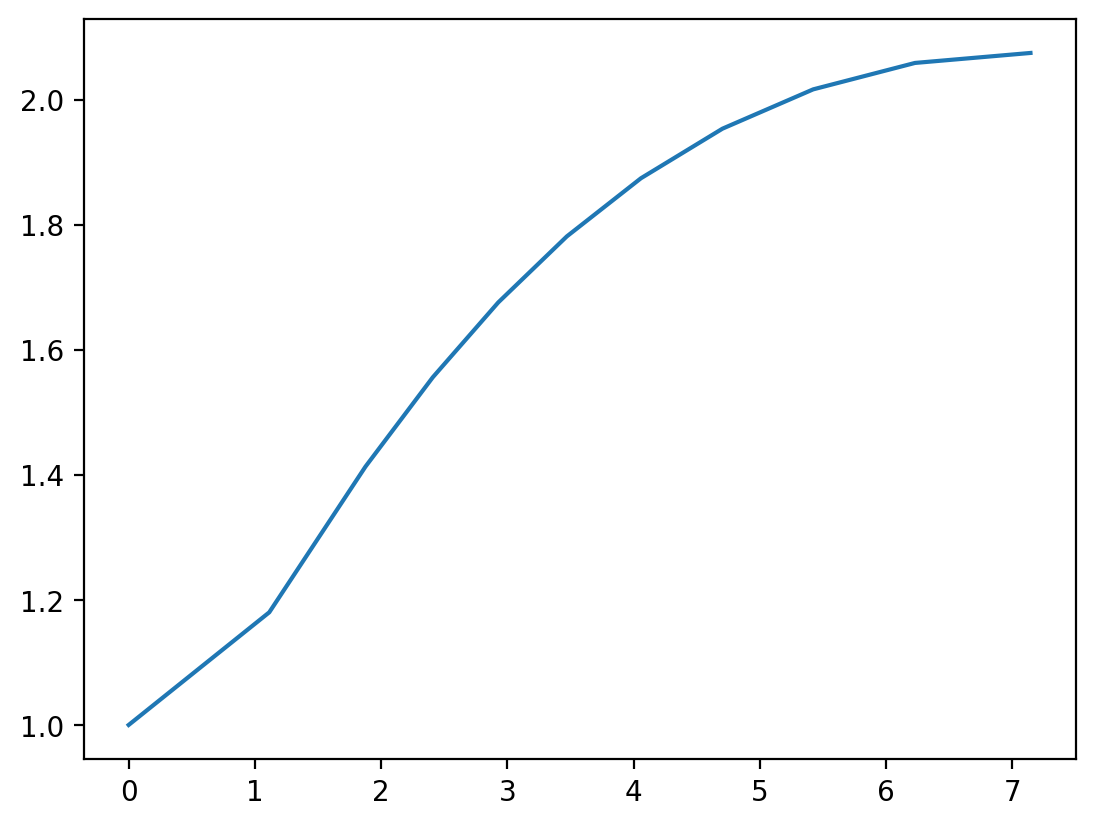

In [19]:
plt.plot([table.loc[i]['x'] for i in walls], [table.loc[i]['y'] for i in walls])

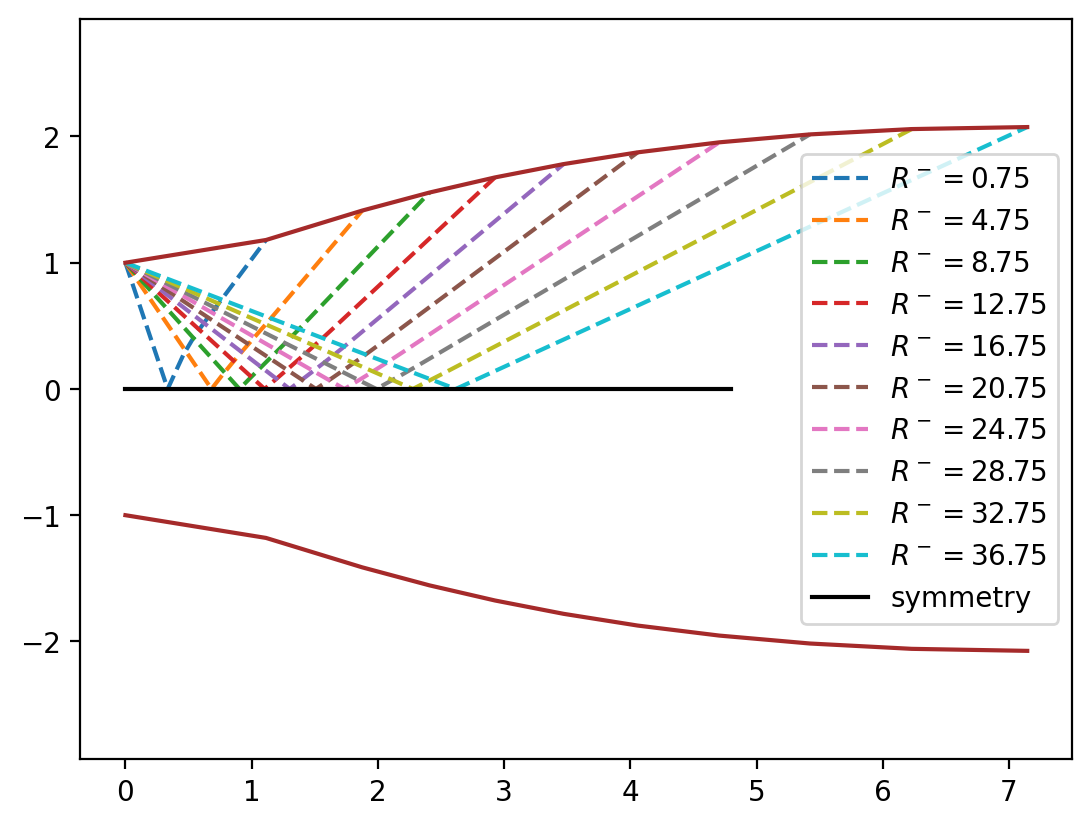

In [20]:
starts = iter(alphabet[:num_lines])
for line in reflected_lines:
    line_x = []
    line_y = []
    line.insert(0, next(starts))
    for point in line:
        line_x.append(table.loc[point]['x'])
        line_y.append(table.loc[point]['y'])
        
    plt.plot(line_x, line_y, label = fr"$R^-= {table.loc[line[0]]['R-']:.2f}$", linestyle = "--")
    
plt.plot([table.loc[i]['x'] for i in walls], [table.loc[i]['y'] for i in walls], color = "brown")
plt.plot([table.loc[i]['x'] for i in walls], [-table.loc[i]['y'] for i in walls], color = "brown")
plt.plot([0, 4.8], [0, 0], label = "symmetry", color="black")
plt.axis('equal')
#plt.savefig('highres')
plt.legend()

In [21]:
print(table.to_latex(float_format="%.4f"))

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & R+ & R- & theta & nu & M & mu & theta + mu & theta - mu & x & y \\
name &  &  &  &  &  &  &  &  &  &  \\
\midrule
a & 0.0000 & 0.7460 & 0.3730 & 0.3730 & 1.0417 & 73.7362 & 74.1092 & -73.3632 & 0.0000 & 1.0000 \\
b & 0.0000 & 4.7461 & 2.3730 & 2.3730 & 1.1496 & 60.4396 & 62.8126 & -58.0666 & 0.0000 & 1.0000 \\
c & 0.0000 & 8.7461 & 4.3731 & 4.3731 & 1.2324 & 54.2360 & 58.6090 & -49.8629 & 0.0000 & 1.0000 \\
d & 0.0000 & 12.7462 & 6.3731 & 6.3731 & 1.3074 & 49.8964 & 56.2695 & -43.5233 & 0.0000 & 1.0000 \\
e & 0.0000 & 16.7462 & 8.3731 & 8.3731 & 1.3786 & 46.4997 & 54.8728 & -38.1266 & 0.0000 & 1.0000 \\
f & 0.0000 & 20.7463 & 10.3731 & 10.3731 & 1.4478 & 43.6867 & 54.0599 & -33.3136 & 0.0000 & 1.0000 \\
g & 0.0000 & 24.7464 & 12.3732 & 12.3732 & 1.5159 & 41.2758 & 53.6490 & -28.9027 & 0.0000 & 1.0000 \\
h & 0.0000 & 28.7464 & 14.3732 & 14.3732 & 1.5835 & 39.1608 & 53.5340 & -24.7876 & 0.0000 & 1.0000 \\
i & 0.0000 & 32.7465 & 16.3732 & 16.3732 &

In [22]:
table

R+         R-     theta         nu         M         mu  \
name                                                                   
a      0.000000   0.746000  0.373000   0.373000  1.041686  73.736229   
b      0.000000   4.746059  2.373030   2.373030  1.149642  60.439609   
c      0.000000   8.746118  4.373059   4.373059  1.232391  54.235950   
d      0.000000  12.746177  6.373089   6.373089  1.307392  49.896438   
e      0.000000  16.746236  8.373118   8.373118  1.378606  46.499669   
...         ...        ...       ...        ...       ...        ...   
61    32.746472  32.746472  0.000000  32.746472  2.239356  26.522991   
62    32.746472  36.746531  2.000030  34.746502  2.318555  25.550287   
63    32.746472        NaN  2.000030  34.746502  2.318555  25.550287   
64    36.746531  36.746531  0.000000  36.746531  2.400000  24.624318   
65    36.746531        NaN  0.000000  36.746531  2.400000  24.624318   

      theta + mu  theta - mu         x         y  
name                                              
a      74.109229  -73.363229  0.000000  1.000000  
b      62.812639  -58.066580  0.000000  1.000000  
c      58.609009  -49.862891  0.000000  1.000000  
d      56.269527  -43.523349  0.000000  1.000000  
e      54.872787  -38.126551  0.000000  1.000000  
...          ...         ...       ...       ...  
61     26.522991  -26.522991  2.276806  0.000000  
62     27.550317  -23.550258  2.537618  0.133100  
63     27.550317  -23.550258  6.228849  2.058755  
64     24.624318  -24.624318  2.617464  0.000000  
65     24.624318  -24.624318  7.143989  2.074730  

[75 rows x 10 columns]

In [1]:
word1 = input("give me your first word\n")
word2 = input("give me your first word\n")
if sorted(word1) == sorted(word2):
    print("theyre anagrams")
else:
    print("theyre not")

give me your first word
 garden
give me your first word
 danger


theyre anagrams
